In [88]:
import pandas as pd

In [89]:
df = pd.read_csv('ETF_data.csv')

In [90]:
df = df.drop(columns=['combined_ret', 'equity'])

In [91]:
df['Date'] = pd.to_datetime(df['Date'])

In [92]:
df

,Date,XLF_ret1,XOP_ret1,XLK_ret1
0,2013-12-31,FILL IN THE REST OF THE CALCS,NaN,NaN
1,2014-01-02,-0.005489929,-0.020720,-0.009793
2,2014-01-03,0.006900054,-0.009090,-0.004804
3,2014-01-06,0.000913484,-0.005414,-0.001704
4,2014-01-07,0.000456325,0.009223,0.009101
...,...,...,...,...
2527,2024-01-17,-0.001874665,-0.011416,-0.004929
2528,2024-01-18,0.001609928,0.000078,0.020285
2529,2024-01-19,0.016072809,0.002185,0.023050
2530,2024-01-22,0.00474561,0.004593,0.004396


In [93]:
print(df.isnull().sum())

Date        1
XLF_ret1    1
XOP_ret1    2
XLK_ret1    2
dtype: int64


In [94]:
df = df.dropna().copy()

In [95]:
df

,Date,XLF_ret1,XOP_ret1,XLK_ret1
1,2014-01-02,-0.005489929,-0.020720,-0.009793
2,2014-01-03,0.006900054,-0.009090,-0.004804
3,2014-01-06,0.000913484,-0.005414,-0.001704
4,2014-01-07,0.000456325,0.009223,0.009101
5,2014-01-08,0.003193978,-0.004495,0.000000
...,...,...,...,...
2526,2024-01-16,-0.006914841,-0.030729,0.002497
2527,2024-01-17,-0.001874665,-0.011416,-0.004929
2528,2024-01-18,0.001609928,0.000078,0.020285
2529,2024-01-19,0.016072809,0.002185,0.023050


In [96]:
df.dtypes


Date        datetime64[ns]
XLF_ret1            object
XOP_ret1           float64
XLK_ret1           float64
dtype: object

In [97]:
df.loc[:, 'XLF_ret1'] = pd.to_numeric(df['XLF_ret1'], errors='coerce')
df.loc[:, 'XOP_ret1'] = pd.to_numeric(df['XOP_ret1'], errors='coerce')
df.loc[:, 'XLK_ret1'] = pd.to_numeric(df['XLK_ret1'], errors='coerce')


In [98]:
df.loc[:, 'equal_weighted_return'] = (df['XLF_ret1'] + df['XOP_ret1'] + df['XLK_ret1']) / 3

In [99]:
print(df[['Date', 'equal_weighted_return']])

           Date equal_weighted_return
1    2014-01-02             -0.012001
2    2014-01-03             -0.002331
3    2014-01-06             -0.002068
4    2014-01-07               0.00626
5    2014-01-08             -0.000434
...         ...                   ...
2526 2024-01-16             -0.011716
2527 2024-01-17             -0.006073
2528 2024-01-18              0.007324
2529 2024-01-19              0.013769
2530 2024-01-22              0.004578

[2530 rows x 2 columns]


In [100]:
df.loc[:, 'equal_weighted_equity'] = 100 * (1 + df['equal_weighted_return']).cumprod()

In [102]:
!pip install matplotlib

  Using cached matplotlib-3.10.0-cp312-cp312-macosx_11_0_arm64.whl.metadata (11 kB)
  Using cached contourpy-1.3.1-cp312-cp312-macosx_11_0_arm64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.8-cp312-cp312-macosx_11_0_arm64.whl.metadata (6.2 kB)
  Using cached pyparsing-3.2.1-py3-none-any.whl.metadata (5.0 kB)
Using cached matplotlib-3.10.0-cp312-cp312-macosx_11_0_arm64.whl (8.0 MB)
Using cached contourpy-1.3.1-cp312-cp312-macosx_11_0_arm64.whl (255 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 10.3 MB/s eta 0:00:00 0:00:01
Using cached kiwisolver-1.4.8-cp312-cp312-macosx_11_0_arm64.whl (65 kB)
Using cached pyparsing-3.2.1-py3-none-any.whl (107 kB)


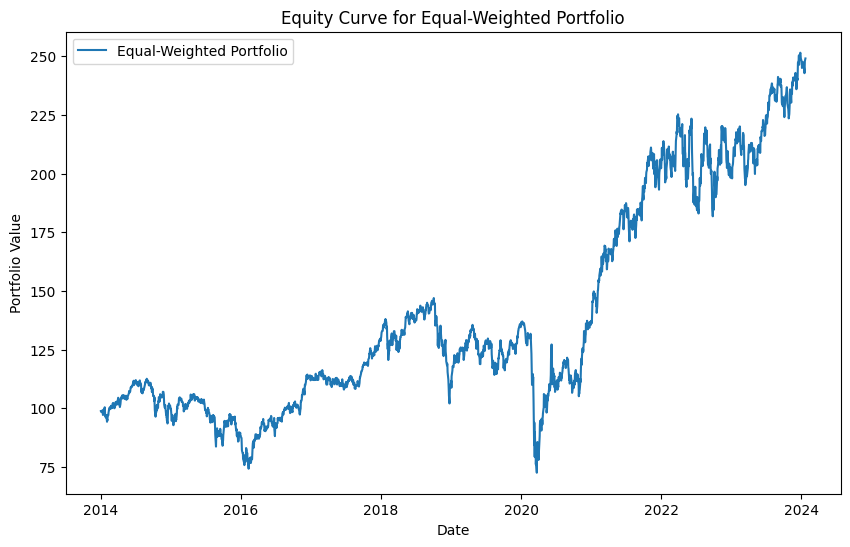

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['equal_weighted_equity'], label='Equal-Weighted Portfolio')
plt.title('Equity Curve for Vol-Weighted Portfolio')
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.legend()
plt.show()

In [106]:
df['XLF_vol'] = df['XLF_ret1'].rolling(20).std()
df['XOP_vol'] = df['XOP_ret1'].rolling(20).std()
df['XLK_vol'] = df['XLK_ret1'].rolling(20).std()

In [107]:
df['XLF_w_raw'] = 1 / df['XLF_vol']
df['XOP_w_raw'] = 1 / df['XOP_vol']
df['XLK_w_raw'] = 1 / df['XLK_vol']

df['w_sum'] = df['XLF_w_raw'] + df['XOP_w_raw'] + df['XLK_w_raw']

df['XLF_weight'] = df['XLF_w_raw'] / df['w_sum']
df['XOP_weight'] = df['XOP_w_raw'] / df['w_sum']
df['XLK_weight'] = df['XLK_w_raw'] / df['w_sum']

In [108]:
df['XLF_weight_shifted'] = df['XLF_weight'].shift(1)
df['XOP_weight_shifted'] = df['XOP_weight'].shift(1)
df['XLK_weight_shifted'] = df['XLK_weight'].shift(1)

In [109]:
df['risk_parity_return'] = (
    df['XLF_ret1'] * df['XLF_weight_shifted'] +
    df['XOP_ret1'] * df['XOP_weight_shifted'] +
    df['XLK_ret1'] * df['XLK_weight_shifted']
)

In [110]:
df['risk_parity_equity'] = 100 * (1 + df['risk_parity_return']).cumprod()

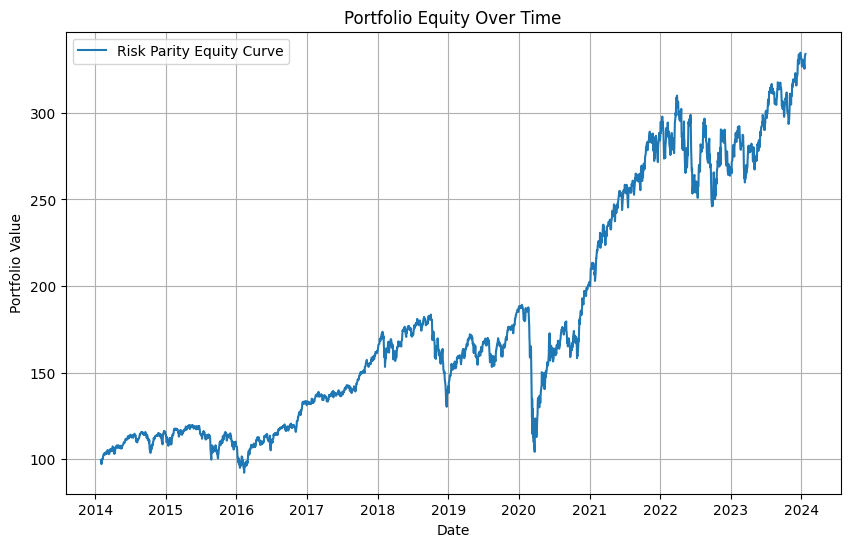

In [111]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Plot the risk-parity equity curve
plt.plot(df['Date'], df['risk_parity_equity'], label='Risk Parity Equity Curve')

plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.title('Portfolio Equity Over Time')
plt.legend()
plt.grid(True)

plt.show()

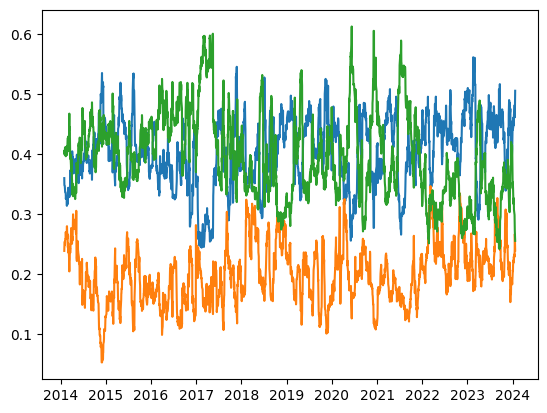

In [112]:
plt.plot(df['Date'], df['XLF_weight'], label='XLF Weight')
plt.plot(df['Date'], df['XOP_weight'], label='XOP Weight')
plt.plot(df['Date'], df['XLK_weight'], label='XLK Weight')

In [ ]:
df['running_max'] = df['risk_parity_equity'].cummax()

In [115]:
df['drawdown'] = (df['risk_parity_equity'] - df['running_max']) / df['running_max']

In [116]:
print(df['drawdown'])

1            NaN
2            NaN
3            NaN
4            NaN
5            NaN
          ...   
2526   -0.022773
2527   -0.027673
2528    -0.02103
2529    -0.00667
2530   -0.002091
Name: drawdown, Length: 2530, dtype: object
